In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mentalHealthData.csv to mentalHealthData (3).csv


In [ ]:
file_path = 'mentalHealthData.csv'  # Update with your uploaded file's path
data = pd.read_csv(file_path)
print("Dataset Preview:\n", data.head())

Dataset Preview:
              Timestamp  \
0  10/25/2024 18:31:41   
1  11/13/2024 21:44:35   
2  11/13/2024 21:45:20   
3  11/13/2024 21:47:23   
4  11/13/2024 23:22:52   

  How many hours of sleep do you get on average per night?   \
0                                       5 to 7 hours          
1                                  Less than 5 hours          
2                                       5 to 7 hours          
3                                       7 to 9 hours          
4                                       5 to 7 hours          

   How would you rate your sleep quality?    \
0                                      Fair   
1                                      Fair   
2                                      Fair   
3                                      Fair   
4                                      Fair   

    How often do you exercise in a week?    \
0                                  0 times   
1                                1-2 times   
2                        

In [ ]:
# Handle Missing Values
num_imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
data.drop(columns=['Timestamp'], inplace=True)
print("\nAfter Handling Missing Values:\n", data.head())



After Handling Missing Values:
   How many hours of sleep do you get on average per night?   \
0                                       5 to 7 hours          
1                                  Less than 5 hours          
2                                       5 to 7 hours          
3                                       7 to 9 hours          
4                                       5 to 7 hours          

   How would you rate your sleep quality?    \
0                                      Fair   
1                                      Fair   
2                                      Fair   
3                                      Fair   
4                                      Fair   

    How often do you exercise in a week?    \
0                                  0 times   
1                                1-2 times   
2                                  0 times   
3                                1-2 times   
4                                  0 times   

     On a scale of 1 to 10, 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Debugging the column issue
print("Columns in DataFrame:", data.columns)

# Filter out non-existent columns
categorical_cols = [col for col in categorical_cols if col in data.columns]

# Encode valid categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("\nAfter Encoding Categorical Variables:\n", data.head())

Columns in DataFrame: Index(['How many hours of sleep do you get on average per night? ',
       ' How would you rate your sleep quality?  ',
       '  How often do you exercise in a week?  ',
       '  On a scale of 1 to 10, how stressed do you feel today?  ',
       '  How often do you feel academic stress?  ',
       '  How frequently do you interact socially with others(friends or family)?  ',
       '  On a scale of 1 to 10, how would you rate your overall mood today?  ',
       '  On a scale of 1 to 10, how happy do you feel overall?  ',
       '  How often do you experience anxiety symptoms?  ',
       'Based on your overall feelings, how would you describe your mental health status? '],
      dtype='object')

After Encoding Categorical Variables:
    How many hours of sleep do you get on average per night?   \
0                                                  0           
1                                                  2           
2                                         

In [ ]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nAfter Scaling Numerical Features:\n", data.head())


After Scaling Numerical Features:
    How many hours of sleep do you get on average per night?   \
0                                                  0           
1                                                  2           
2                                                  0           
3                                                  1           
4                                                  0           

    How would you rate your sleep quality?    \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

     How often do you exercise in a week?    \
0                                         0   
1                                         1   
2                                         0   
3                                         1   
4                                         0   

     On

In [ ]:
#remove feature with low varience
selector = VarianceThreshold(threshold=0.01)
data = pd.DataFrame(selector.fit_transform(data), columns=data.columns[selector.get_support()])

print("\nAfter Removing Low-Variance Features:\n", data.head())


After Removing Low-Variance Features:
    How many hours of sleep do you get on average per night?   \
0                                                0.0           
1                                                2.0           
2                                                0.0           
3                                                1.0           
4                                                0.0           

    How would you rate your sleep quality?    \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

     How often do you exercise in a week?    \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

   

In [ ]:
z_scores = np.abs(zscore(data))
data = data[(z_scores < 3).all(axis=1)]  # Keep only rows without extreme outliers

print("\nAfter Outlier Removal:\n", data.head())


After Outlier Removal:
    How many hours of sleep do you get on average per night?   \
0                                                0.0           
1                                                2.0           
2                                                0.0           
3                                                1.0           
4                                                0.0           

    How would you rate your sleep quality?    \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

     How often do you exercise in a week?    \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

     On a scale of

In [ ]:
#normlize data
minmax_scaler = MinMaxScaler()
data[numerical_cols] = minmax_scaler.fit_transform(data[numerical_cols])

print("\nAfter Normalizing Data:\n", data.head())


After Normalizing Data:
    How many hours of sleep do you get on average per night?   \
0                                                0.0           
1                                                2.0           
2                                                0.0           
3                                                1.0           
4                                                0.0           

    How would you rate your sleep quality?    \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

     How often do you exercise in a week?    \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

     On a scale o

In [ ]:
data.to_csv('dataAfterPreprocessing.csv', index=False)

# Download the new CSV file
from google.colab import files
files.download('dataAfterPreprocessing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

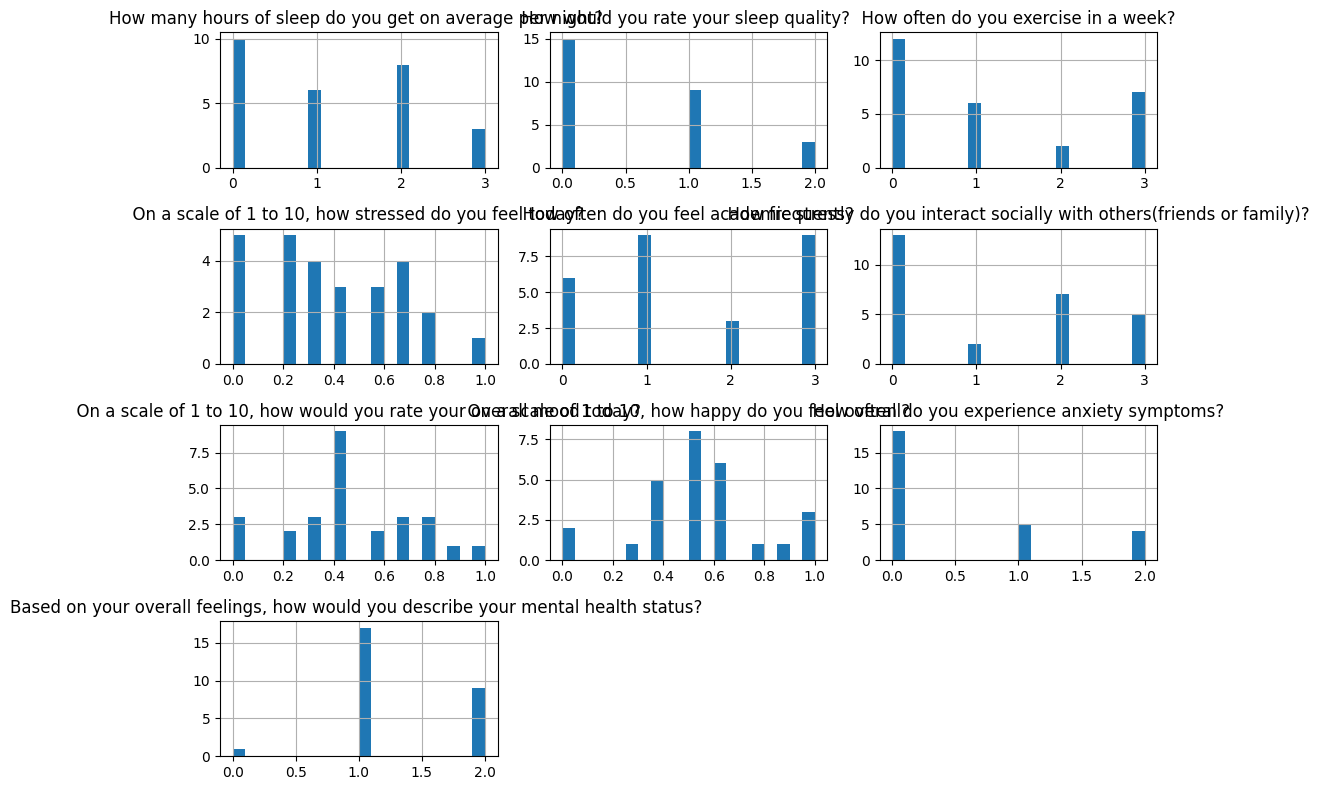

In [ ]:
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

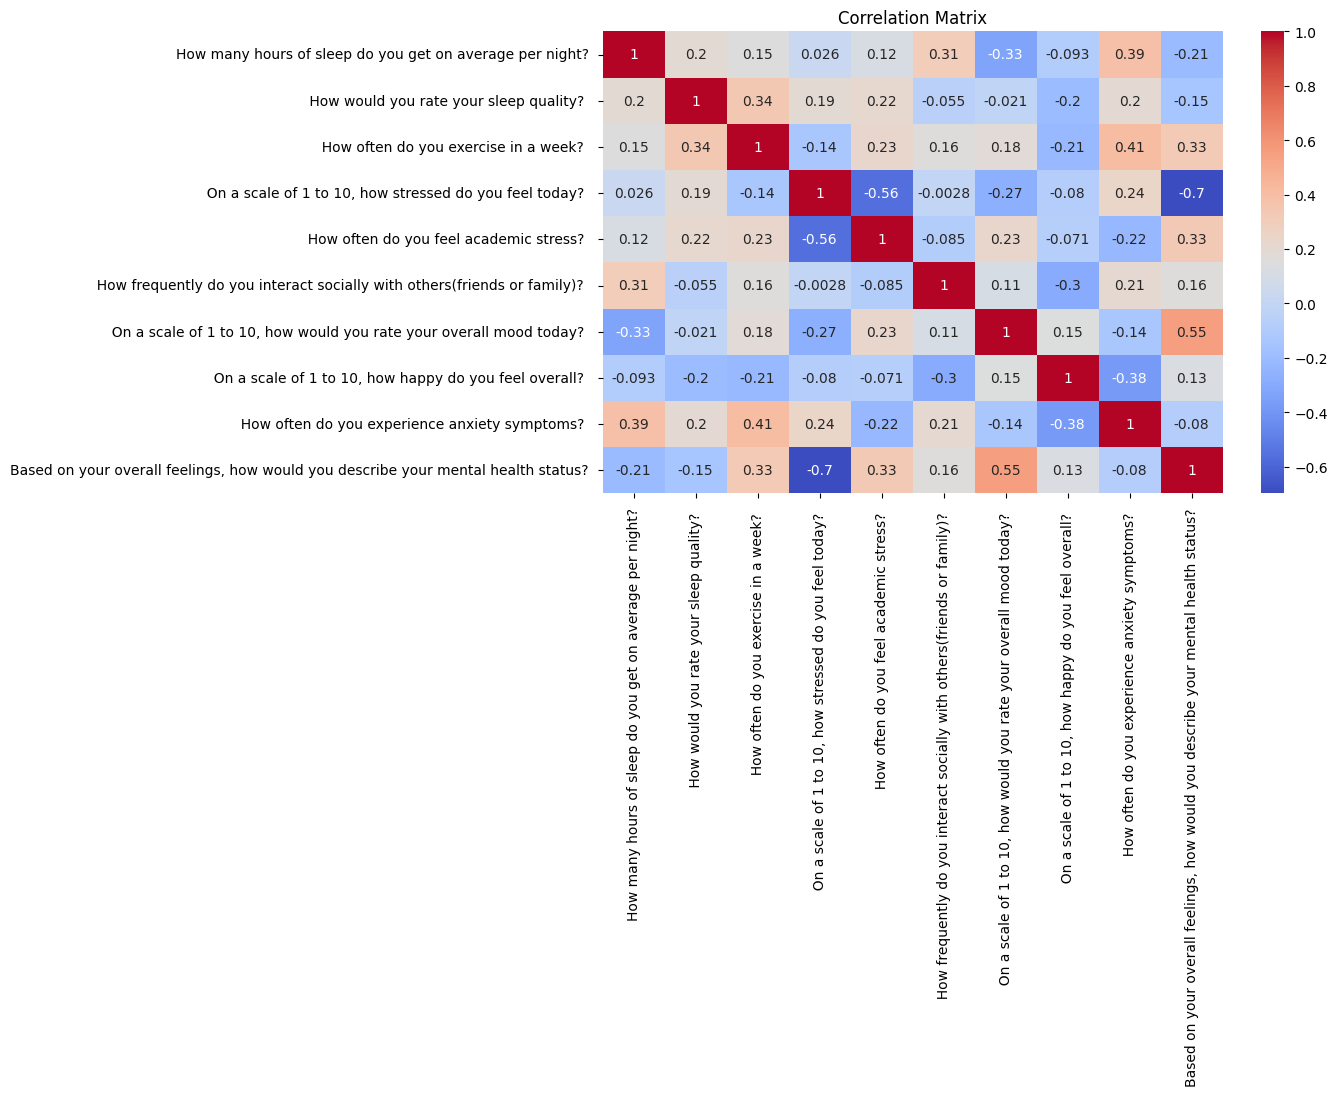

In [ ]:
# 4. Visualizing Correlation Matrix using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Renamed columns: Index(['Sleep Hours (avg)', 'Sleep Quality (rating)',
       'Exercise Frequency (weekly)', 'Stress Level (1-10)',
       'Academic Stress (frequency)', 'Social Interaction (frequency)',
       'Happiness (1-10)', 'Mood Today (1-10)', 'Anxiety Symptoms (frequency)',
       'Mental Health Status'],
      dtype='object')


<Figure size 1400x800 with 0 Axes>

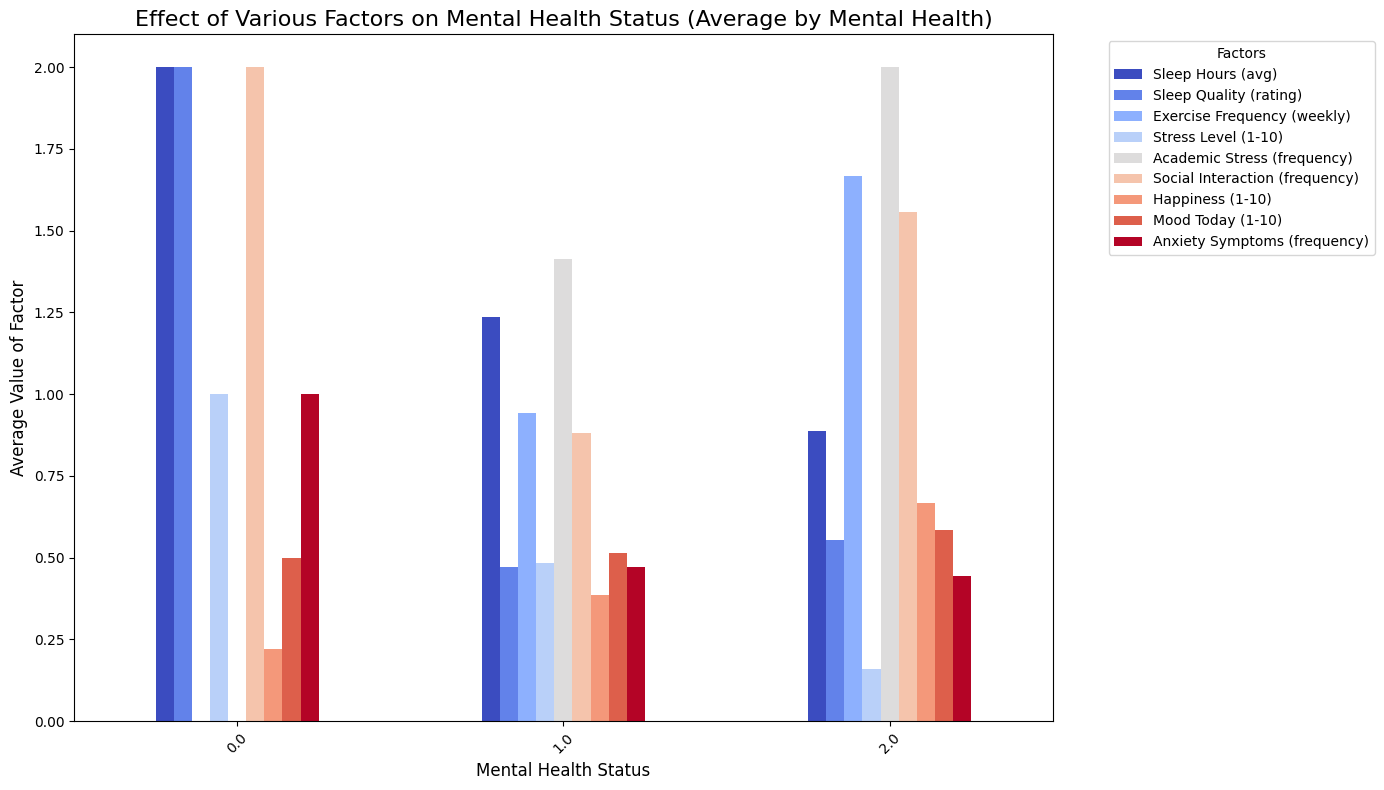

In [ ]:
# Rename columns with clearer names
data.columns = [
    "Sleep Hours (avg)",
    "Sleep Quality (rating)",
    "Exercise Frequency (weekly)",
    "Stress Level (1-10)",
    "Academic Stress (frequency)",
    "Social Interaction (frequency)",
    "Happiness (1-10)",
    "Mood Today (1-10)",
    "Anxiety Symptoms (frequency)",
    "Mental Health Status"
]

# Print column names again to ensure the renaming worked correctly
print("Renamed columns:", data.columns)

# Group the data by 'Mental Health Status' and calculate the mean of each factor
mental_health_column = 'Mental Health Status'
feature_columns = [
    'Sleep Hours (avg)',
    'Sleep Quality (rating)',
    'Exercise Frequency (weekly)',
    'Stress Level (1-10)',
    'Academic Stress (frequency)',
    'Social Interaction (frequency)',
    'Happiness (1-10)',
    'Mood Today (1-10)',
    'Anxiety Symptoms (frequency)'
]

# Group by 'Mental Health Status' and calculate the mean of each feature
grouped_data = data.groupby(mental_health_column)[feature_columns].mean()

# Create a bar plot to show the average effect of each factor on mental health status
plt.figure(figsize=(14, 8))
grouped_data.plot(kind='bar', figsize=(14, 8), colormap='coolwarm')

# Adding the title and labels
plt.title('Effect of Various Factors on Mental Health Status (Average by Mental Health)', fontsize=16)
plt.xlabel('Mental Health Status', fontsize=12)
plt.ylabel('Average Value of Factor', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
!pip install pandas scikit-learn

# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from google.colab import files

# Split features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create a DataFrame and display results
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,1.000000,1.000000,1.000000,1.000000
0,Decision Tree,0.833333,1.000000,0.833333,0.904762
2,Logistic Regression,0.666667,0.666667,0.666667,0.666667
4,KNN,0.666667,0.444444,0.666667,0.533333
1,SVM,0.500000,0.400000,0.500000,0.444444


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Test the model
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Decision Tree Model Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.75      0.86         4
         2.0       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.67      0.58      0.62         6
weighted avg       1.00      0.83      0.90         6



In [ ]:
import numpy as np

# Function to take manual input and test the model
def test_model(model, feature_names):
    print("\nEnter values for the following features (provide numerical values):")
    manual_input = []

    for feature in feature_names:
        value = input(f"{feature}: ")
        try:
            manual_input.append(float(value))  # Convert input to float
        except ValueError:
            print("Invalid input. Please enter numeric values.")
            return

    # Convert the input into a format the model understands
    manual_input_array = np.array(manual_input).reshape(1, -1)

    # Make a prediction
    prediction = model.predict(manual_input_array)
    print("\nPrediction:", prediction[0])

    # Optional: Predict probabilities (if supported)
    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba(manual_input_array)
        print("Prediction Probabilities:", probabilities)

# Feature names (based on your dataset columns, excluding the target column)
feature_names = ['Sleep Hours (avg)', 'Sleep Quality (rating)',
                 'Exercise Frequency (weekly)', 'Stress Level (1-10)',
                 'Academic Stress (frequency)', 'Social Interaction (frequency)',
                 'Happiness (1-10)', 'Mood Today (1-10)', 'Anxiety Symptoms (frequency)']

# Test the model with manual input
test_model(decision_tree, feature_names)



Enter values for the following features (provide numerical values):
Sleep Hours (avg): 1
Sleep Quality (rating): 1
Exercise Frequency (weekly): 2
Stress Level (1-10): 0.2222
Academic Stress (frequency): 1
Social Interaction (frequency): 2
Happiness (1-10): 0.8888
Mood Today (1-10): 2
Anxiety Symptoms (frequency): 1

Prediction: 2.0
Prediction Probabilities: [[0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
